In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
server_nbrs  = np.genfromtxt('speedtest_results.csv', dtype=int, delimiter=',', usecols=(0))
server_urls = np.genfromtxt('speedtest_results.csv', dtype=str, delimiter=',', usecols=(1))
server_locations = np.genfromtxt('speedtest_results.csv', dtype=str, delimiter=',', usecols=(2))
timestamps = np.genfromtxt('speedtest_results.csv', dtype=str, delimiter=',', usecols=(3))
distance = np.genfromtxt('speedtest_results.csv', dtype=float, delimiter=',', usecols=(4))
pings = np.genfromtxt('speedtest_results.csv', dtype=float, delimiter=',', usecols=(5))
mbits_down = np.genfromtxt('speedtest_results.csv', dtype=float, delimiter=',', usecols=(6))
mbits_up = np.genfromtxt('speedtest_results.csv', dtype=float, delimiter=',', usecols=(7))
unknown = np.genfromtxt('speedtest_results.csv', dtype=str, delimiter=',', usecols=(8))
ips = np.genfromtxt('speedtest_results.csv', dtype=str, delimiter=',', usecols=(9))

print("Total amount of measurements: ", len(timestamps))

Total amount of measurements:  151


In [3]:
# Geräte im Netzwerk zum Zeitpunkt der Messung

# Jede Zeile, die mit "Starting Nmap..." beginnt kennzeichnet eine neue Messung und enthält den entsprechenden Zeitstempel
# Jede darauf folgende Zeile kennzeichnet ein zu dem Zeitpunkt der Messung im LAN befindliches Gerät.

lan_devices = np.array([])

# Cycle through the device file
with open("lan_devices.txt", 'r') as device_file:
    ctr = 0
    for line in device_file:
        if "Starting" in line:
            # New scan -> reset ctr
            lan_devices = np.append(lan_devices, ctr)
            ctr = 0
        elif "report" in line:
            # There is an additional device
            ctr += 1
        else:
            # There is an unexpected line here!
            print("hmmmm...")

print(len(timestamps), len(lan_devices))

151 151


In [4]:
# Result in Mbit/s
mbits_down = mbits_down * 1e-6
mbits_up = mbits_up * 1e-6

In [5]:
# Distance of x_ticks on the time axis
tick_distance = 24 # 24 = Half a day

times = np.array([''])

# Clear timestamps
for idx, timestamp in enumerate(timestamps):
    # Instead of dealing with pyplot xticks, empty every n-th timestamp
    if idx % tick_distance == 0:
        timestamp = timestamp.replace('T', ' ')
        timestamp = timestamp[:-8]
        timestamps[idx] = timestamp
        times = np.append(times, timestamp)
    #else:
        #timestamps[idx] = ''

['' '2021-04-05 20:09:23' '2021-04-06 07:55:45' '2021-04-06 20:11:11'
 '2021-04-07 08:27:02' '2021-04-10 16:07:52' '2021-04-11 06:33:01'
 '2021-04-11 17:00:51']


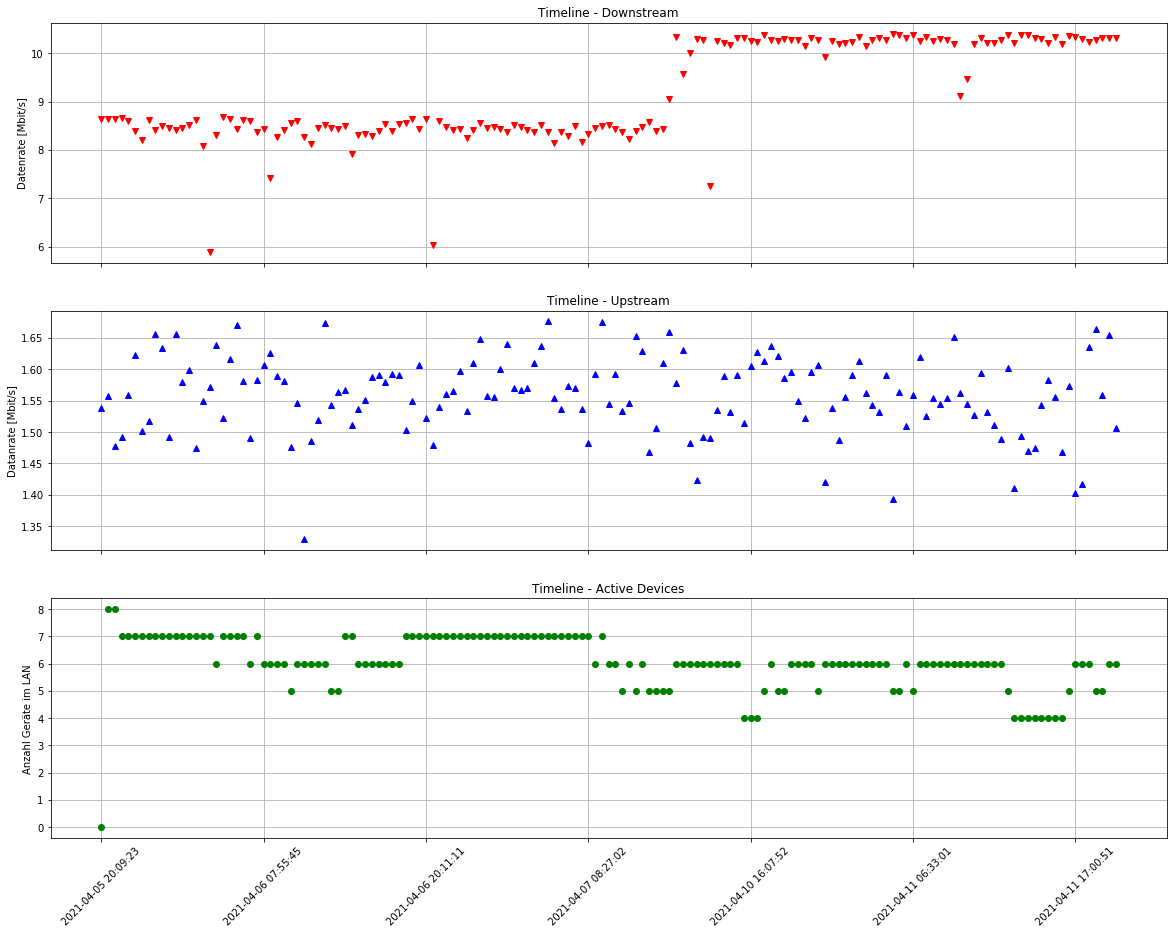

In [6]:
fig , ax = plt.subplots(3, 1, figsize=(20,15))

ax[0].set_title('Timeline - Downstream')
ax[0].set_ylabel('Datenrate [Mbit/s]')
ax[0].plot(timestamps, mbits_down, 'v', color='red')
ax[0].xaxis.set_major_locator(MultipleLocator(tick_distance))
ax[0].set_xticklabels([])
ax[0].grid()

ax[1].set_title('Timeline - Upstream')
ax[1].set_ylabel('Datanrate [Mbit/s]')
ax[1].plot(timestamps, mbits_up, '^', color='blue')
ax[1].xaxis.set_major_locator(MultipleLocator(tick_distance))
ax[1].set_xticklabels([])
ax[1].grid()

ax[2].set_title('Timeline - Active Devices')
ax[2].set_ylabel('Anzahl Geräte im LAN')
ax[2].plot(timestamps, lan_devices, 'o', color='green')
ax[2].xaxis.set_major_locator(MultipleLocator(tick_distance))
ax[2].set_xticklabels(times, rotation=45)
ax[2].grid()

print(times)
plt.savefig('timeline_down_up_dev.pdf')

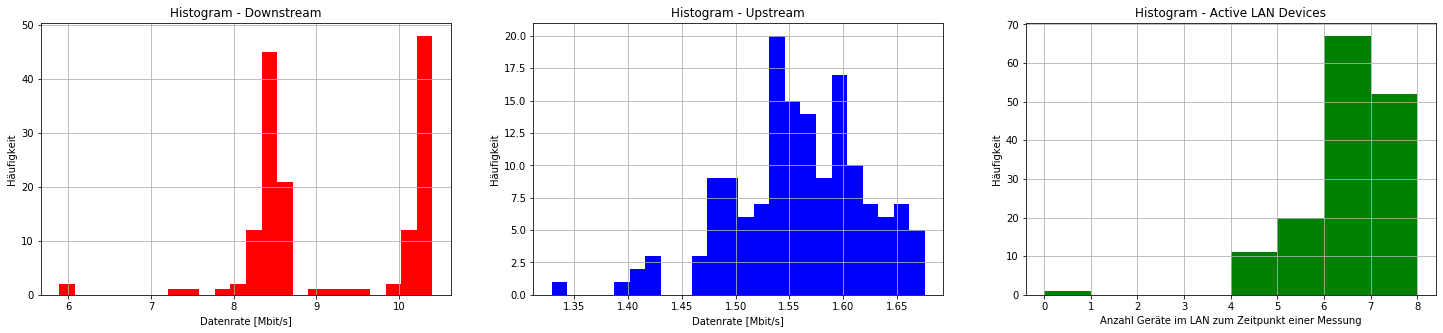

In [10]:
hist_bins = 25

fig, ax = plt.subplots(1, 3, figsize=(25,5))

ax[0].hist(mbits_down, color='red', bins = np.linspace(np.min(mbits_down), np.max(mbits_down), hist_bins))
ax[0].set_title('Histogram - Downstream')
ax[0].set_xlabel('Datenrate [Mbit/s]')
ax[0].set_ylabel('Häufigkeit')
ax[0].grid()

ax[1].hist(mbits_up, color='blue', bins = np.linspace(np.min(mbits_up), np.max(mbits_up), hist_bins)) 
ax[1].set_title("Histogram - Upstream")
ax[1].set_xlabel('Datenrate [Mbit/s]')
ax[1].set_ylabel('Häufigkeit')
ax[1].grid()

ax[2].hist(lan_devices, color='green', bins=int(np.max(lan_devices)))
ax[2].set_title("Histogram - Active LAN Devices")
ax[2].set_xlabel('Anzahl Geräte im LAN zum Zeitpunkt einer Messung')
ax[2].set_ylabel('Häufigkeit')
ax[2].grid()

plt.savefig('histogram_down_up_dev.pdf')

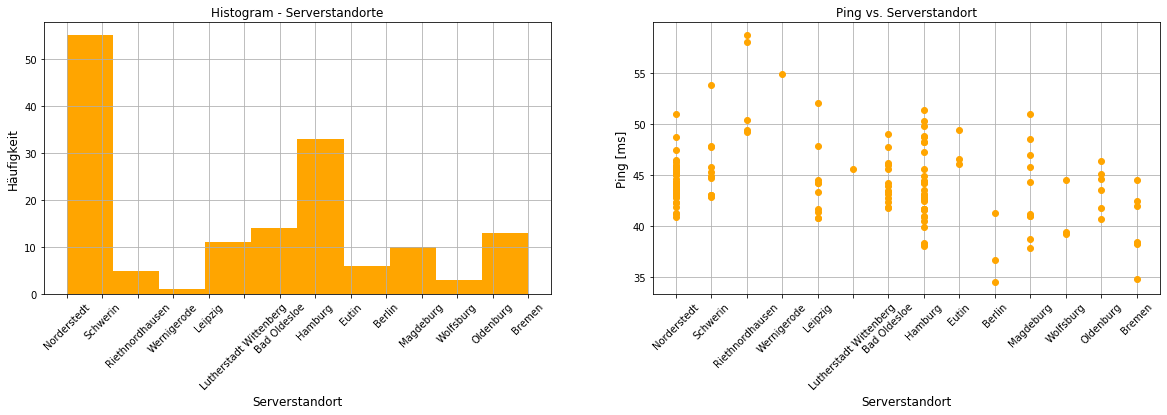

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].hist(server_locations, color='orange')
ax[0].set_title('Histogram - Serverstandorte', fontsize='large')
ax[0].set_xlabel('Serverstandort', fontsize='large')
ax[0].set_ylabel('Häufigkeit', fontsize='large')
ax[0].grid()
ax[0].tick_params(axis='x', labelrotation=45)

ax[1].plot(server_locations, pings, 'o', color='orange')
ax[1].set_title("Ping vs. Serverstandort", fontsize='large')
ax[1].set_xlabel('Serverstandort', fontsize='large')
ax[1].set_ylabel('Ping [ms]', fontsize='large')
ax[1].grid()
ax[1].tick_params(axis='x', labelrotation=45)

plt.savefig('histogram_serverLocations_ping.pdf')